# web scrapping of cityfibre reviews from trustpilot

In [1]:
#Importing libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv

#list of URL's that will be scraped.
#first 100 pages of Trustpilot

list_of_urls =['https://uk.trustpilot.com/review/cityfibre.com',
              'https://uk.trustpilot.com/review/cityfibre.com?page=2',
              'https://uk.trustpilot.com/review/cityfibre.com?page=3',
              'https://uk.trustpilot.com/review/cityfibre.com?page=4',
              'https://uk.trustpilot.com/review/cityfibre.com?page=5',
              'https://uk.trustpilot.com/review/cityfibre.com?page=6',
              'https://uk.trustpilot.com/review/cityfibre.com?page=7',
              'https://uk.trustpilot.com/review/cityfibre.com?page=8',
              'https://uk.trustpilot.com/review/cityfibre.com?page=9',
              'https://uk.trustpilot.com/review/cityfibre.com?page=10',
              'https://uk.trustpilot.com/review/cityfibre.com?page=11',
              'https://uk.trustpilot.com/review/cityfibre.com?page=12',
              'https://uk.trustpilot.com/review/cityfibre.com?page=13',
              'https://uk.trustpilot.com/review/cityfibre.com?page=14',
              'https://uk.trustpilot.com/review/cityfibre.com?page=15',
              'https://uk.trustpilot.com/review/cityfibre.com?page=16',
              'https://uk.trustpilot.com/review/cityfibre.com?page=17',
              'https://uk.trustpilot.com/review/cityfibre.com?page=18',
              'https://uk.trustpilot.com/review/cityfibre.com?page=19',
              'https://uk.trustpilot.com/review/cityfibre.com?page=20',
              'https://uk.trustpilot.com/review/cityfibre.com?page=21',
              'https://uk.trustpilot.com/review/cityfibre.com?page=22',
              'https://uk.trustpilot.com/review/cityfibre.com?page=23',
              'https://uk.trustpilot.com/review/cityfibre.com?page=24',
              'https://uk.trustpilot.com/review/cityfibre.com?page=25',
              'https://uk.trustpilot.com/review/cityfibre.com?page=26',
              'https://uk.trustpilot.com/review/cityfibre.com?page=27',
              'https://uk.trustpilot.com/review/cityfibre.com?page=28',
              'https://uk.trustpilot.com/review/cityfibre.com?page=29',
              'https://uk.trustpilot.com/review/cityfibre.com?page=30',
              'https://uk.trustpilot.com/review/cityfibre.com?page=31',
              'https://uk.trustpilot.com/review/cityfibre.com?page=32',
              'https://uk.trustpilot.com/review/cityfibre.com?page=33',
              'https://uk.trustpilot.com/review/cityfibre.com?page=34',
              'https://uk.trustpilot.com/review/cityfibre.com?page=35',
              'https://uk.trustpilot.com/review/cityfibre.com?page=36',
              'https://uk.trustpilot.com/review/cityfibre.com?page=37',
              'https://uk.trustpilot.com/review/cityfibre.com?page=38',
              'https://uk.trustpilot.com/review/cityfibre.com?page=39',
              'https://uk.trustpilot.com/review/cityfibre.com?page=40',
              'https://uk.trustpilot.com/review/cityfibre.com?page=41',
              'https://uk.trustpilot.com/review/cityfibre.com?page=42',
              'https://uk.trustpilot.com/review/cityfibre.com?page=43',
              'https://uk.trustpilot.com/review/cityfibre.com?page=44',
              'https://uk.trustpilot.com/review/cityfibre.com?page=45',
              'https://uk.trustpilot.com/review/cityfibre.com?page=46',
              'https://uk.trustpilot.com/review/cityfibre.com?page=47',
              'https://uk.trustpilot.com/review/cityfibre.com?page=48',
              'https://uk.trustpilot.com/review/cityfibre.com?page=49',
              'https://uk.trustpilot.com/review/cityfibre.com?page=50',
              'https://uk.trustpilot.com/review/cityfibre.com?page=51',
              'https://uk.trustpilot.com/review/cityfibre.com?page=52',
              'https://uk.trustpilot.com/review/cityfibre.com?page=53',
              'https://uk.trustpilot.com/review/cityfibre.com?page=54',
              'https://uk.trustpilot.com/review/cityfibre.com?page=55',
              'https://uk.trustpilot.com/review/cityfibre.com?page=56',
              'https://uk.trustpilot.com/review/cityfibre.com?page=57',
              'https://uk.trustpilot.com/review/cityfibre.com?page=58',
              'https://uk.trustpilot.com/review/cityfibre.com?page=59',
              'https://uk.trustpilot.com/review/cityfibre.com?page=60',
              'https://uk.trustpilot.com/review/cityfibre.com?page=61',
              'https://uk.trustpilot.com/review/cityfibre.com?page=62',
              'https://uk.trustpilot.com/review/cityfibre.com?page=63',
              'https://uk.trustpilot.com/review/cityfibre.com?page=64',
              'https://uk.trustpilot.com/review/cityfibre.com?page=65',
              'https://uk.trustpilot.com/review/cityfibre.com?page=66',
              'https://uk.trustpilot.com/review/cityfibre.com?page=67',
              'https://uk.trustpilot.com/review/cityfibre.com?page=68',
              'https://uk.trustpilot.com/review/cityfibre.com?page=69',
              'https://uk.trustpilot.com/review/cityfibre.com?page=70',
              'https://uk.trustpilot.com/review/cityfibre.com?page=71',
              'https://uk.trustpilot.com/review/cityfibre.com?page=72',
              'https://uk.trustpilot.com/review/cityfibre.com?page=73',
              'https://uk.trustpilot.com/review/cityfibre.com?page=74',
              'https://uk.trustpilot.com/review/cityfibre.com?page=75',
              'https://uk.trustpilot.com/review/cityfibre.com?page=76',
              'https://uk.trustpilot.com/review/cityfibre.com?page=77',
              'https://uk.trustpilot.com/review/cityfibre.com?page=78',
              'https://uk.trustpilot.com/review/cityfibre.com?page=79',
              'https://uk.trustpilot.com/review/cityfibre.com?page=80',
              'https://uk.trustpilot.com/review/cityfibre.com?page=81',
              'https://uk.trustpilot.com/review/cityfibre.com?page=82',
              'https://uk.trustpilot.com/review/cityfibre.com?page=83',
              'https://uk.trustpilot.com/review/cityfibre.com?page=84',
              'https://uk.trustpilot.com/review/cityfibre.com?page=85',
              'https://uk.trustpilot.com/review/cityfibre.com?page=86',
              'https://uk.trustpilot.com/review/cityfibre.com?page=87',
              'https://uk.trustpilot.com/review/cityfibre.com?page=88',
              'https://uk.trustpilot.com/review/cityfibre.com?page=89',
              'https://uk.trustpilot.com/review/cityfibre.com?page=90',
              'https://uk.trustpilot.com/review/cityfibre.com?page=91',
              'https://uk.trustpilot.com/review/cityfibre.com?page=92',
              'https://uk.trustpilot.com/review/cityfibre.com?page=93',
              'https://uk.trustpilot.com/review/cityfibre.com?page=94',
              'https://uk.trustpilot.com/review/cityfibre.com?page=95',
              'https://uk.trustpilot.com/review/cityfibre.com?page=96',
              'https://uk.trustpilot.com/review/cityfibre.com?page=97',
              'https://uk.trustpilot.com/review/cityfibre.com?page=98',
              'https://uk.trustpilot.com/review/cityfibre.com?page=99',
              'https://uk.trustpilot.com/review/cityfibre.com?page=100']


#creating list 
names =[]
reviews = []
data_string = ""

for url in list_of_urls: 
    params = {'api_key': "enter API key", 'url': url} #using the ScraperAPI proxy manager to block off anti-bot
    response = requests.get('http://api.scraperapi.com/',   
params=urlencode(params)) #send a get request for the specific URL’s HTML to the web server.
    
    soup_object = BeautifulSoup(response.text, 'html.parser') #convert the data into a BeautifulSoup object
    
#For each of the data elements we want to extract, find all the HTML lines that are within a specific tag and class.
#extract the data elements and store the data in a list. For this project, am extracting reviewer names and review text.

    for item in soup_object.find_all("span", {"class": "typography_heading-xxs__QKBS8 typography_appearance-default__AAY17"}):                 #name element
        data_string = data_string + item.get_text()
        names.append(data_string)
        data_string = ""
    
    for item in soup_object.find_all("p", {"class": "typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):       #reviews element
        data_string = data_string + item.get_text()
        reviews.append(data_string)
        data_string = ""
    
# Create the dictionary.
reviews_dict = {'Names': names, 'Reviews': reviews}

# Print the lengths of each list.  
print(len(names), len(reviews))

1981 1785


In [2]:
#Create the Data Frame
df = pd.DataFrame.from_dict(reviews_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
Names,Michael Douglas,Janette Sked,Lee,Jason Lihou,Nina Trofa,Gerald,BARRY HARVEY,Christopher Pancoust,Jenny Lovegrove,John Garden,...,Brenda Lawrence,Francisco Javier Colom Escrig,Terry,Paweł Szumiński,Michael Morris,Jacob the king,Haroon Nikzaad,Giedrius B,George Gemmell,Ria Knott
Reviews,Faz and Jamie provided a good experience from ...,They explained everything they were doing from...,"Once the installation date was confirmed, it w...",The CityFibre Portsmouth crew are a very profe...,Thank you to Has and Andy for a very quick and...,Excellent provision of fibre broadband. Arrive...,City fibre came to my house 2 times because I ...,The 2 installers Ali and Abs were absolutely s...,We are so impressed with our City Fibre instal...,Initially the install seems to be going well b...,...,None,None,None,None,None,None,None,None,None,None


In [3]:
#create function to transpose dataframe
def switch_col (df):
    col_switch=df.T
    return col_switch

# Transpose the dataframe to switch the column;row orientation.


In [4]:
#print transposed column
cityfibre_reviews= switch_col (df)
print(cityfibre_reviews)

                Names                                            Reviews
0     Michael Douglas  Faz and Jamie provided a good experience from ...
1        Janette Sked  They explained everything they were doing from...
2                 Lee  Once the installation date was confirmed, it w...
3         Jason Lihou  The CityFibre Portsmouth crew are a very profe...
4          Nina Trofa  Thank you to Has and Andy for a very quick and...
...               ...                                                ...
1976   Jacob the king                                               None
1977   Haroon Nikzaad                                               None
1978       Giedrius B                                               None
1979   George Gemmell                                               None
1980        Ria Knott                                               None

[1981 rows x 2 columns]


In [5]:
def get_missing_sum(cityfibre_reviews):
    missing=cityfibre_reviews.isnull().sum().sum()
    return missing

In [6]:
#print missing value sum

sum_null = get_missing_sum(cityfibre_reviews)
print(sum_null)

196


In [7]:
#create function to check missing value per columns
def get_missing_col(cityfibre_reviews):
    col_missing=cityfibre_reviews.isnull().sum()
    return col_missing

In [8]:
#print missing values per column
col_null=get_missing_col(cityfibre_reviews)
print(col_null)

Names        0
Reviews    196
dtype: int64


In [9]:
#create function to drop missing value col

def drop_na (cityfibre_reviews):
    dropped=cityfibre_reviews.dropna()
    return dropped

In [10]:
#print df
cityfibre_reviews= drop_na (cityfibre_reviews)
cityfibre_reviews=cityfibre_reviews.reset_index(drop=True)
cityfibre_reviews

,Names,Reviews
0,Michael Douglas,Faz and Jamie provided a good experience from ...
1,Janette Sked,They explained everything they were doing from...
2,Lee,"Once the installation date was confirmed, it w..."
3,Jason Lihou,The CityFibre Portsmouth crew are a very profe...
4,Nina Trofa,Thank you to Has and Andy for a very quick and...
...,...,...
1780,GC,Turned up within the allotted time frame. Expl...
1781,Miss Hannigan,Internet slow
1782,Steven Langlands,This is amazing pac I will recommend if you wa...
1783,Rowena,"Experience was great , installation was quick."


In [11]:
#create a function to get an overview of the dataframe

def get_overview (cityfibre_reviews):
    abt= cityfibre_reviews.info()
    return abt

In [12]:
#print overview
overview = get_overview (cityfibre_reviews)
print(overview)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Names    1785 non-null   object
 1   Reviews  1785 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB
None


In [13]:
#create a function to evalute the statistical summary of the dataframe
def get_stats_summary (cityfibre_reviews):
    stats=cityfibre_reviews.describe()
    return stats

In [14]:
#print stats
statistical_summary = get_stats_summary (cityfibre_reviews)
print(statistical_summary)

           Names                                            Reviews
count       1785                                               1785
unique      1667                                               1785
top     customer  Faz and Jamie provided a good experience from ...
freq          21                                                  1


In [15]:
#create a fucntion to get the dataframe shape

def get_shape (cityfibre_reviews):
    shape= cityfibre_reviews.shape
    return shape

In [16]:
#print shape

data_shape= get_shape (cityfibre_reviews)
print(data_shape)

(1785, 2)


In [17]:
#create function to check for duplicate
def get_duplicate (cityfibre_reviews):
    duplicates=cityfibre_reviews.duplicated().sum().sum()
    return duplicates

In [18]:
#print duplicates
duplicate_sum= get_duplicate (cityfibre_reviews)
print(duplicate_sum)

0


In [19]:
#create function to check unique values
def check_unique (Reviews):
    unique= cityfibre_reviews.Reviews.unique()
    return unique

In [20]:
#print unique 
unique_reviews= check_unique ('Reviews')
print(unique_reviews)

['Faz and Jamie provided a good experience from start to finish. They let me know when they would be arriving, they were personable, polite and professional. They kept me updated and answered any questions that I had, ensuring I was fully set up before they left. They explained lots and were friendly and they tidied up, any mess that was generated. A brilliant experience and these guys are an asset to your company. Thank you highly recommended.'
 'They explained everything they were doing from the moment they entered my place and even though,the outside cable seem to be the problem they explained what they were going to do and sorted it,then explained how to use ,also what to do ie ring if any problems in the future,left it tidy and clean were very polite and helpful'
 'Once the installation date was confirmed, it was an extremely efficient process. The young lady installing the system was extremely considerate, courteous and very knowledgeable. She walked me through the installation, 

# Text Preprocessing

In [21]:
# create function Removing three consecutive commas (,,,). from Names column
def remove_commas (Reviews):
    no_commas = cityfibre_reviews.Reviews.apply(lambda x: x.split(',,,')[0])
    return no_commas
#cityfibre_reviews['Names']=cityfibre_reviews['Names'].apply(lambda x: x.split(',,,')[0])

In [22]:
#print dataframe
cityfibre_reviews['Reviews'] = remove_commas ('Reviews')
#print(cityfibre_reviews)
cityfibre_reviews['Reviews']

0       Faz and Jamie provided a good experience from ...
1       They explained everything they were doing from...
2       Once the installation date was confirmed, it w...
3       The CityFibre Portsmouth crew are a very profe...
4       Thank you to Has and Andy for a very quick and...
                              ...                        
1780    Turned up within the allotted time frame. Expl...
1781                                        Internet slow
1782    This is amazing pac I will recommend if you wa...
1783       Experience was great , installation was quick.
1784    Their guys are great, explain everything, clea...
Name: Reviews, Length: 1785, dtype: object

In [23]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Yesterday I had the pleasure of meeting 2 amazing people. Adam Wilson and his co worker Adon Baxter to install new wifi box and wires. They were both respectful of my property, both inside and outside, left everything as they found it. Adam Wilson discussed and explained fully what he was doing at every point. Adam also helped me download the app and explained how to use it. Adam and Adon was both polite and friendly. Fantastic service. Thank you.
Review 2:
 Instalation, excelent! The problems started that evening! The broadband shuts down every hour to an hour and a half and takes about sixty seconds to re-boot!! Have had to turn the old router back on. I am currently trying to get hold of City Fibre. The funny thing is I was quite happy with my existing broadband. I'm with Talk Talk by the way.
Review 3:
 I was notified when the installer would arrive then the installation was explained to me regarding route of cables etc,a little bit of my mono block had to be lifted so t

In [24]:
#Create function to remove exclamation!!! from reviews
def remove_exlamation (Reviews):
    no_exclamaton = cityfibre_reviews.Reviews.apply(lambda x: x.split('!!!')[0])
    return no_exclamaton

In [25]:
#print dataframe
cityfibre_reviews['Reviews'] = remove_exlamation ('Reviews')
#print(cityfibre_reviews)
cityfibre_reviews['Reviews']

0       Faz and Jamie provided a good experience from ...
1       They explained everything they were doing from...
2       Once the installation date was confirmed, it w...
3       The CityFibre Portsmouth crew are a very profe...
4       Thank you to Has and Andy for a very quick and...
                              ...                        
1780    Turned up within the allotted time frame. Expl...
1781                                        Internet slow
1782    This is amazing pac I will recommend if you wa...
1783       Experience was great , installation was quick.
1784    Their guys are great, explain everything, clea...
Name: Reviews, Length: 1785, dtype: object

In [26]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Yesterday I had the pleasure of meeting 2 amazing people. Adam Wilson and his co worker Adon Baxter to install new wifi box and wires. They were both respectful of my property, both inside and outside, left everything as they found it. Adam Wilson discussed and explained fully what he was doing at every point. Adam also helped me download the app and explained how to use it. Adam and Adon was both polite and friendly. Fantastic service. Thank you.
Review 2:
 Instalation, excelent! The problems started that evening! The broadband shuts down every hour to an hour and a half and takes about sixty seconds to re-boot!! Have had to turn the old router back on. I am currently trying to get hold of City Fibre. The funny thing is I was quite happy with my existing broadband. I'm with Talk Talk by the way.
Review 3:
 I was notified when the installer would arrive then the installation was explained to me regarding route of cables etc,a little bit of my mono block had to be lifted so t

In [27]:
#create function to remove punctuation from reviews
import re
import string
def remove_punct (Reviews):
    no_punct = cityfibre_reviews.Reviews.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
    return no_punct

In [28]:
cityfibre_reviews['Reviews'] = remove_punct ('Reviews')
#print(cityfibre_reviews)
cityfibre_reviews['Reviews']

0       Faz and Jamie provided a good experience from ...
1       They explained everything they were doing from...
2       Once the installation date was confirmed it wa...
3       The CityFibre Portsmouth crew are a very profe...
4       Thank you to Has and Andy for a very quick and...
                              ...                        
1780    Turned up within the allotted time frame Expla...
1781                                        Internet slow
1782    This is amazing pac I will recommend if you wa...
1783         Experience was great  installation was quick
1784    Their guys are great explain everything clean ...
Name: Reviews, Length: 1785, dtype: object

In [29]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Yesterday I had the pleasure of meeting 2 amazing people Adam Wilson and his co worker Adon Baxter to install new wifi box and wires They were both respectful of my property both inside and outside left everything as they found it Adam Wilson discussed and explained fully what he was doing at every point Adam also helped me download the app and explained how to use it Adam and Adon was both polite and friendly Fantastic service Thank you
Review 2:
 Instalation excelent The problems started that evening The broadband shuts down every hour to an hour and a half and takes about sixty seconds to reboot Have had to turn the old router back on I am currently trying to get hold of City Fibre The funny thing is I was quite happy with my existing broadband Im with Talk Talk by the way
Review 3:
 I was notified when the installer would arrive then the installation was explained to me regarding route of cables etca little bit of my mono block had to be lifted so the cable could be laid

In [30]:
#Expand Contractions

#Expand Contractions
#Contractions are the shortened versions of words like don’t for do not and how’ll for how will.
#These are used to reduce the speaking and writing time of words.
#expand these contractions for a better analysis of the reviews
#I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms

import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % 
'|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the Reviews column
cityfibre_reviews['Reviews']=cityfibre_reviews['Reviews'].apply(lambda x:expand_contractions(x))

# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Yesterday I had the pleasure of meeting 2 amazing people Adam Wilson and his co worker Adon Baxter to install new wifi box and wires They were both respectful of my property both inside and outside left everything as they found it Adam Wilson discussed and explained fully what he was doing at every point Adam also helped me download the app and explained how to use it Adam and Adon was both polite and friendly Fantastic service Thank you
Review 2:
 Instalation excelent The problems started that evening The broadband shuts down every hour to an hour and a half and takes about sixty seconds to reboot Have had to turn the old router back on I am currently trying to get hold of City Fibre The funny thing is I was quite happy with my existing broadband Im with Talk Talk by the way
Review 3:
 I was notified when the installer would arrive then the installation was explained to me regarding route of cables etca little bit of my mono block had to be lifted so the cable could be laid

In [31]:
#Lowercase the reviews

#Lowercase the reviews
#In NLP, models treat words like Boy and boy differently, even if they are the same.
#Therefore, to overcome this problem, lowercase the text
#using the lower() function available in Python for converting text to lowercase:

#create a function to lowercase the reviews
def lower_case_text (Reviews):
    lowered = cityfibre_reviews.Reviews.apply(lambda x: x.lower())
    return lowered

In [32]:
#print lower case reviews
cityfibre_reviews['Reviews'] = lower_case_text ('Reviews')
cityfibre_reviews['Reviews']

0       faz and jamie provided a good experience from ...
1       they explained everything they were doing from...
2       once the installation date was confirmed it wa...
3       the cityfibre portsmouth crew are a very profe...
4       thank you to has and andy for a very quick and...
                              ...                        
1780    turned up within the allotted time frame expla...
1781                                        internet slow
1782    this is amazing pac i will recommend if you wa...
1783         experience was great  installation was quick
1784    their guys are great explain everything clean ...
Name: Reviews, Length: 1785, dtype: object

In [33]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 yesterday i had the pleasure of meeting 2 amazing people adam wilson and his co worker adon baxter to install new wifi box and wires they were both respectful of my property both inside and outside left everything as they found it adam wilson discussed and explained fully what he was doing at every point adam also helped me download the app and explained how to use it adam and adon was both polite and friendly fantastic service thank you
Review 2:
 instalation excelent the problems started that evening the broadband shuts down every hour to an hour and a half and takes about sixty seconds to reboot have had to turn the old router back on i am currently trying to get hold of city fibre the funny thing is i was quite happy with my existing broadband im with talk talk by the way
Review 3:
 i was notified when the installer would arrive then the installation was explained to me regarding route of cables etca little bit of my mono block had to be lifted so the cable could be laid

In [34]:
#parse preprocessed text into csv file
cityfibre_reviews['Reviews'].to_csv('preprocessed_cityfibre_reviews.csv', index=False, header=True)

In [35]:
#Removing Stopwords with NLTK library
#Stopwords are the most commonly occurring words in a text which do not provide any valuable information. 
#stopwords like they, there, this, where, etc are some of the stopwords

# Importing spacy

import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
cityfibre_reviews['Reviews']=cityfibre_reviews['Reviews'].apply(lambda x: ' '.join([token.lemma_ 
                                                                                    for token in list(nlp(x)) if 
                                                                                    (token.is_stop==False)]))

[nltk_data] Downloading package stopwords to C:\Users\Dayo Tosin
[nltk_data]     Oyeyemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


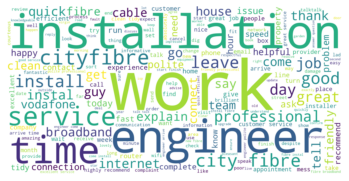

In [36]:
# Visualization
#Generating wordcloud plot

#create some wordclouds to see the most frequently used words in the reviews
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('newWord')
text = " ".join(review for review in cityfibre_reviews.Reviews)

wordcloud = WordCloud(stopwords=stopwords).generate(text)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

In [37]:
#Define a function which can be applied to calculate the sentiment score for the whole dataset

from textblob import TextBlob

def senti_ment (x):
    return TextBlob(x).sentiment  
cityfibre_reviews['sentiment_score'] = cityfibre_reviews['Reviews'].apply(senti_ment)
 
cityfibre_reviews.sentiment_score


0                        (0.38, 0.5307142857142857)
1         (0.32222222222222224, 0.5166666666666667)
2          (0.3416666666666666, 0.8666666666666667)
3        (0.18661616161616157, 0.45770202020202017)
4          (0.3523809523809524, 0.4714285714285714)
                           ...                     
1780       (0.4666666666666667, 0.7444444444444445)
1781    (-0.30000000000000004, 0.39999999999999997)
1782                                   (0.65, 0.75)
1783                    (0.5666666666666667, 0.625)
1784                  (0.39166666666666666, 0.5875)
Name: sentiment_score, Length: 1785, dtype: object

In [38]:
#check the polarity of a review using the TextBlob library in Python

from textblob import TextBlob
cityfibre_reviews['polarity']=cityfibre_reviews['Reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)
cityfibre_reviews['polarity']

0       0.380000
1       0.322222
2       0.341667
3       0.186616
4       0.352381
          ...   
1780    0.466667
1781   -0.300000
1782    0.650000
1783    0.566667
1784    0.391667
Name: polarity, Length: 1785, dtype: float64

In [39]:
#take a look at some of the most positive reviews from the customers

print(" 5 Random Reviews with Highest Polarity:")
for index,review in enumerate(cityfibre_reviews.iloc[cityfibre_reviews['polarity'].sort_values
                                                     (ascending=False)[:5].index]['Reviews']):
    print('Review {}:\n'.format(index+1),review)

 5 Random Reviews with Highest Polarity:
Review 1:
 politeness time excellent knowledge
Review 2:
 appointment cancel day city fibre apart installation excellent
Review 3:
 informative lad come install awesome job
Review 4:
 excellent service installation broadband speed say ultrafast
Review 5:
 excellent customer service engineer visit property


In [40]:
#sample of negative reviews from the customers
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(cityfibre_reviews.iloc[cityfibre_reviews['polarity'].sort_values
                                                     (ascending=True)[:5].index]['Reviews']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 contractor block drain dig road pay terrible customer service touch broadband barge pole
Review 2:
 installer behave horribly
Review 3:
 mum 3 miss engineer appointment install broadband inform go attend ridiculous guy communicate mum lose holiday time job threaten broadband guy truly awful 😣
Review 4:
 land line internet wifi disappointing tell run 2 hour tell 3 day
Review 5:
 shocking experience city fibre expect poor quality service twice installation engineer fail attend book installation visit property communication explanation ring switchboard city fibre tell touch internet provider blame frustrate shamble city fibre time visit book confirmation text message receive rearrange work home waste people time bother turn appointment understand twice joke experience issue read people review


# Topic Modelling
 #Topic Modelling; implementation of Latent Dirichlet Allocation (LDA)
#Topic Modelling are a type of statistical language models used for uncovering hidden structure in a collection of texts 
#LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, 
#and each document is a mixture of over a set of topic probabilities

In [41]:
#Prepare data for LDA Analysis
#transform the textual data in a format that will serve as an input for training LDA model. 
#tokenizing the text and removing stopwords. 
#convert the tokenized object into a corpus and dictionary

#inporting libraries
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = cityfibre_reviews.Reviews.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Dayo Tosin
[nltk_data]     Oyeyemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['faz', 'jamie', 'provide', 'good', 'experience', 'start', 'finish', 'let', 'know', 'arrive', 'personable', 'polite', 'professional', 'keep', 'update', 'answer', 'question', 'ensure', 'fully', 'set', 'leave', 'explain', 'lot', 'friendly', 'tidy', 'mess', 'generate', 'brilliant', 'experience', 'guy']


# LDA model training

In [42]:
import gensim.corpora as corpora
# Create Dictionary

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [43]:
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.060*"work" + 0.043*"engineer" + 0.036*"installation" + 0.034*"service" + '
  '0.032*"good" + 0.030*"explain" + 0.028*"leave" + 0.028*"professional" + '
  '0.023*"job" + 0.023*"friendly"'),
 (1,
  '0.032*"get" + 0.028*"customer" + 0.025*"turn" + 0.024*"week" + '
  '0.022*"communication" + 0.022*"company" + 0.015*"call" + 0.015*"ask" + '
  '0.015*"home" + 0.015*"fast"'),
 (2,
  '0.041*"fibre" + 0.024*"engineer" + 0.022*"cityfibre" + 0.022*"city" + '
  '0.018*"day" + 0.015*"internet" + 0.014*"wait" + 0.013*"tell" + '
  '0.013*"broadband" + 0.012*"cable"'),
 (3,
  '0.058*"great" + 0.052*"install" + 0.043*"time" + 0.042*"quick" + 0.038*"go" '
  '+ 0.030*"hour" + 0.025*"talk" + 0.024*"come" + 0.024*"need" + 0.024*"job"')]


# Dominant topic and its percentage contribution in each document

In [44]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts = data_words):
    # Init output
    sent_topics_cityfibre_reviews = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_cityfibre_reviews = sent_topics_cityfibre_reviews.append(pd.Series([int(topic_num), 
                                                                                                round(prop_topic,4), 
                                                                                                topic_keywords]), 
                                                                                     ignore_index=True)
            else:
                break
    sent_topics_cityfibre_reviews.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_cityfibre_reviews = pd.concat([sent_topics_cityfibre_reviews, contents], axis=1)
    return(sent_topics_cityfibre_reviews)


cityfibre_reviews_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts = data_words)

# Format
cityfibre_reviews_dominant_topic = cityfibre_reviews_topic_sents_keywords.reset_index()
cityfibre_reviews_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
cityfibre_reviews_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9058,"work, engineer, installation, service, good, e...","[faz, jamie, provide, good, experience, start,..."
1,1,0.0,0.6563,"work, engineer, installation, service, good, e...","[explain, moment, enter, place, thoughthe, out..."
2,2,0.0,0.6543,"work, engineer, installation, service, good, e...","[installation, date, confirm, extremely, effic..."
3,3,2.0,0.5853,"fibre, engineer, cityfibre, city, day, interne...","[cityfibre, portsmouth, crew, professional, po..."
4,4,3.0,0.6450,"great, install, time, quick, go, hour, talk, c...","[thank, andy, quick, seamless, install, happy,..."
5,5,0.0,0.5818,"work, engineer, installation, service, good, e...","[excellent, provision, fibre, broadband, arriv..."
6,6,2.0,0.4397,"fibre, engineer, cityfibre, city, day, interne...","[city, fibre, come, house, time, need, waver, ..."
7,7,3.0,0.6233,"great, install, time, quick, go, hour, talk, c...","[installer, ali, ab, absolutely, polite, neat,..."
8,8,0.0,0.8908,"work, engineer, installation, service, good, e...","[impressed, city, fibre, installation, team, e..."
9,9,2.0,0.3563,"fibre, engineer, cityfibre, city, day, interne...","[initially, install, go, ultimately, lack, car..."


# The most representative sentence for each topic

In [45]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sortedcityfibre_reviews_mallet = pd.DataFrame()
sent_topics_outcityfibre_reviews_grpd = cityfibre_reviews_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outcityfibre_reviews_grpd:
    sent_topics_sortedcityfibre_reviews_mallet = pd.concat([sent_topics_sortedcityfibre_reviews_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sortedcityfibre_reviews_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sortedcityfibre_reviews_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sortedcityfibre_reviews_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9421,"work, engineer, installation, service, good, explain, leave, professional, job, friendly","[chris, liam, excellent, job, helpful, cheerful, clean, tidy, mess, leave, pleased, work]"
1,1.0,0.9022,"get, customer, turn, week, communication, company, call, ask, home, fast","[feed, persistent, cold, call, rude, forthright, irritate]"
2,2.0,0.9571,"fibre, engineer, cityfibre, city, day, internet, wait, tell, broadband, cable","[city, fibre, book, twice, come, cancel, time, reason, rd, time, wait, till, pm, show, cost, wag..."
3,3.0,0.8073,"great, install, time, quick, go, hour, talk, come, need, job","[installer, behave, horribly]"


# Frequency Distribution of Word Counts in Documents

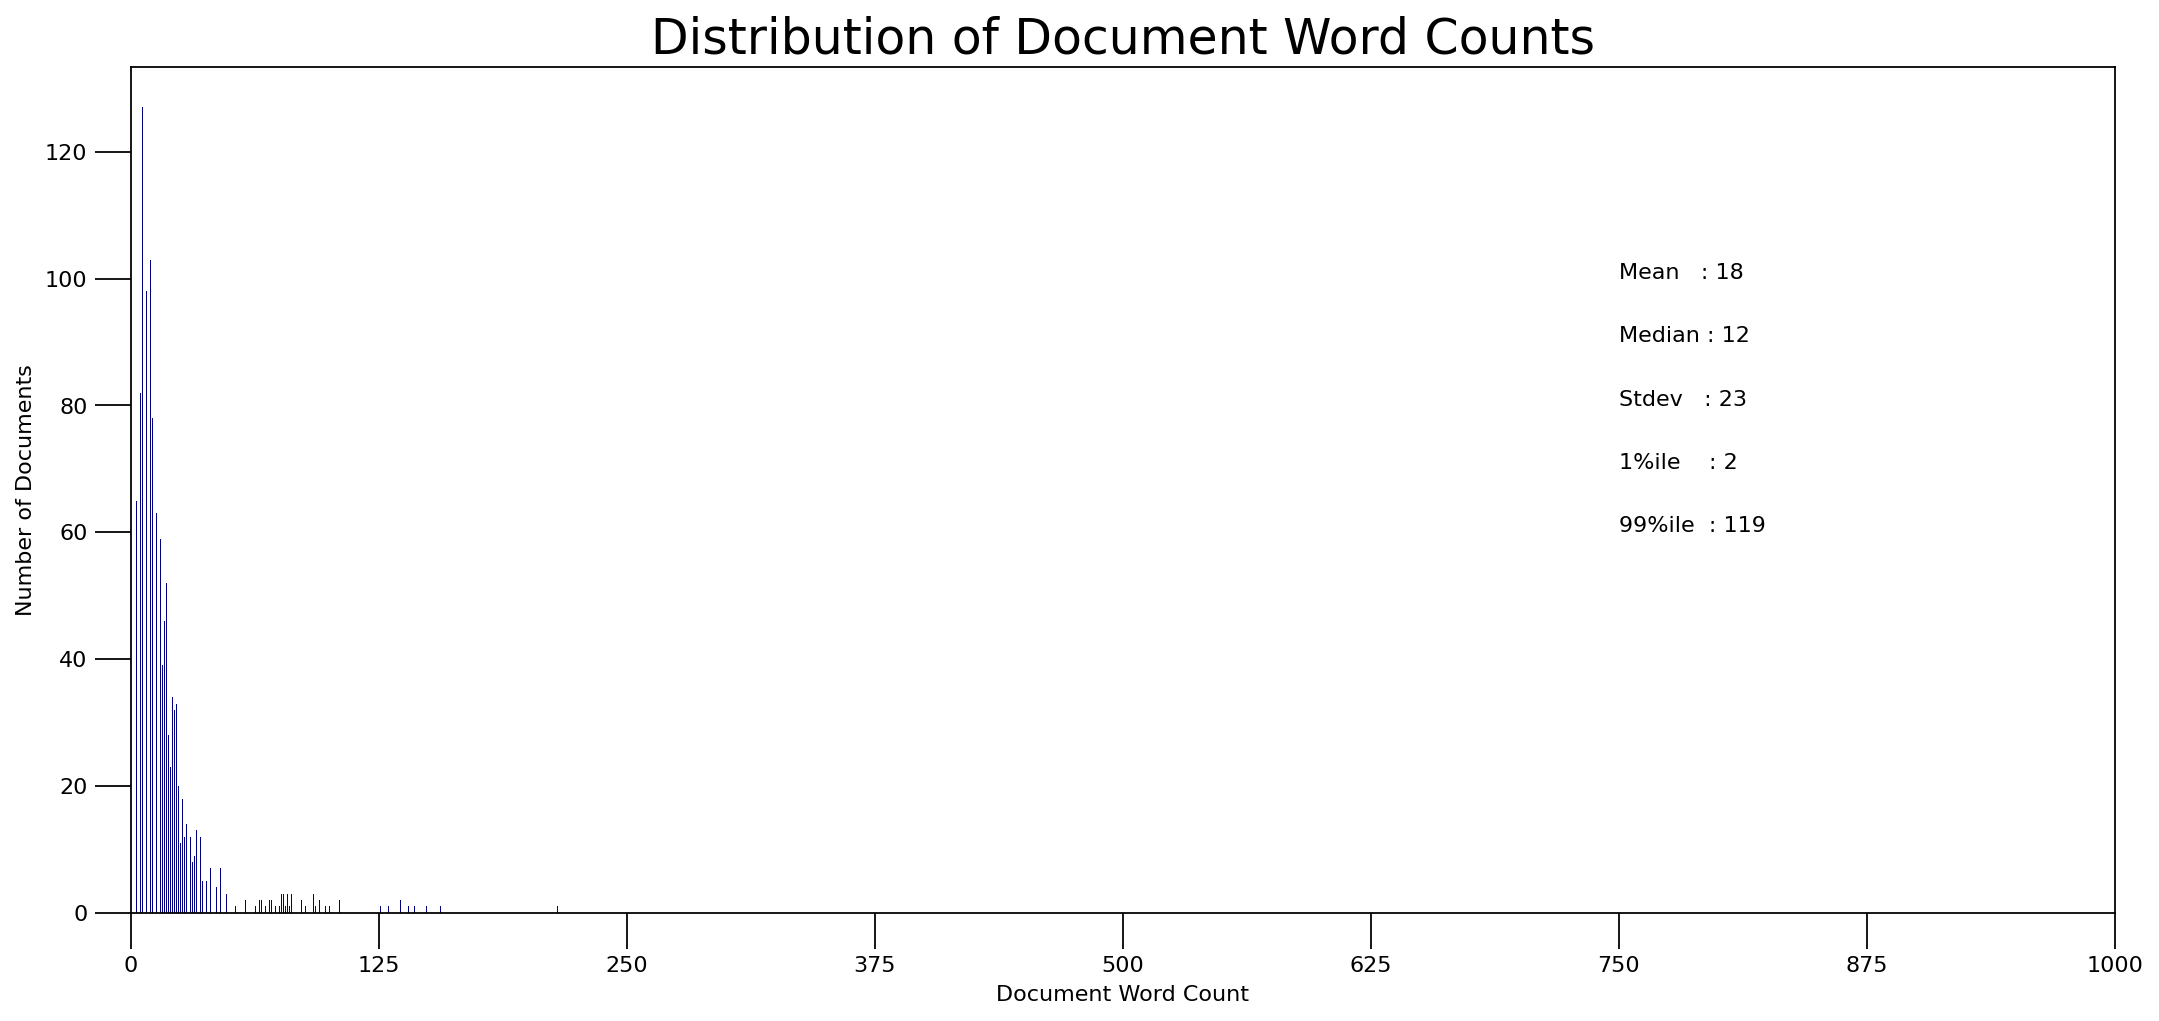

In [46]:
# document word counts distribution plot

doc_lens = [len(d) for d in cityfibre_reviews_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

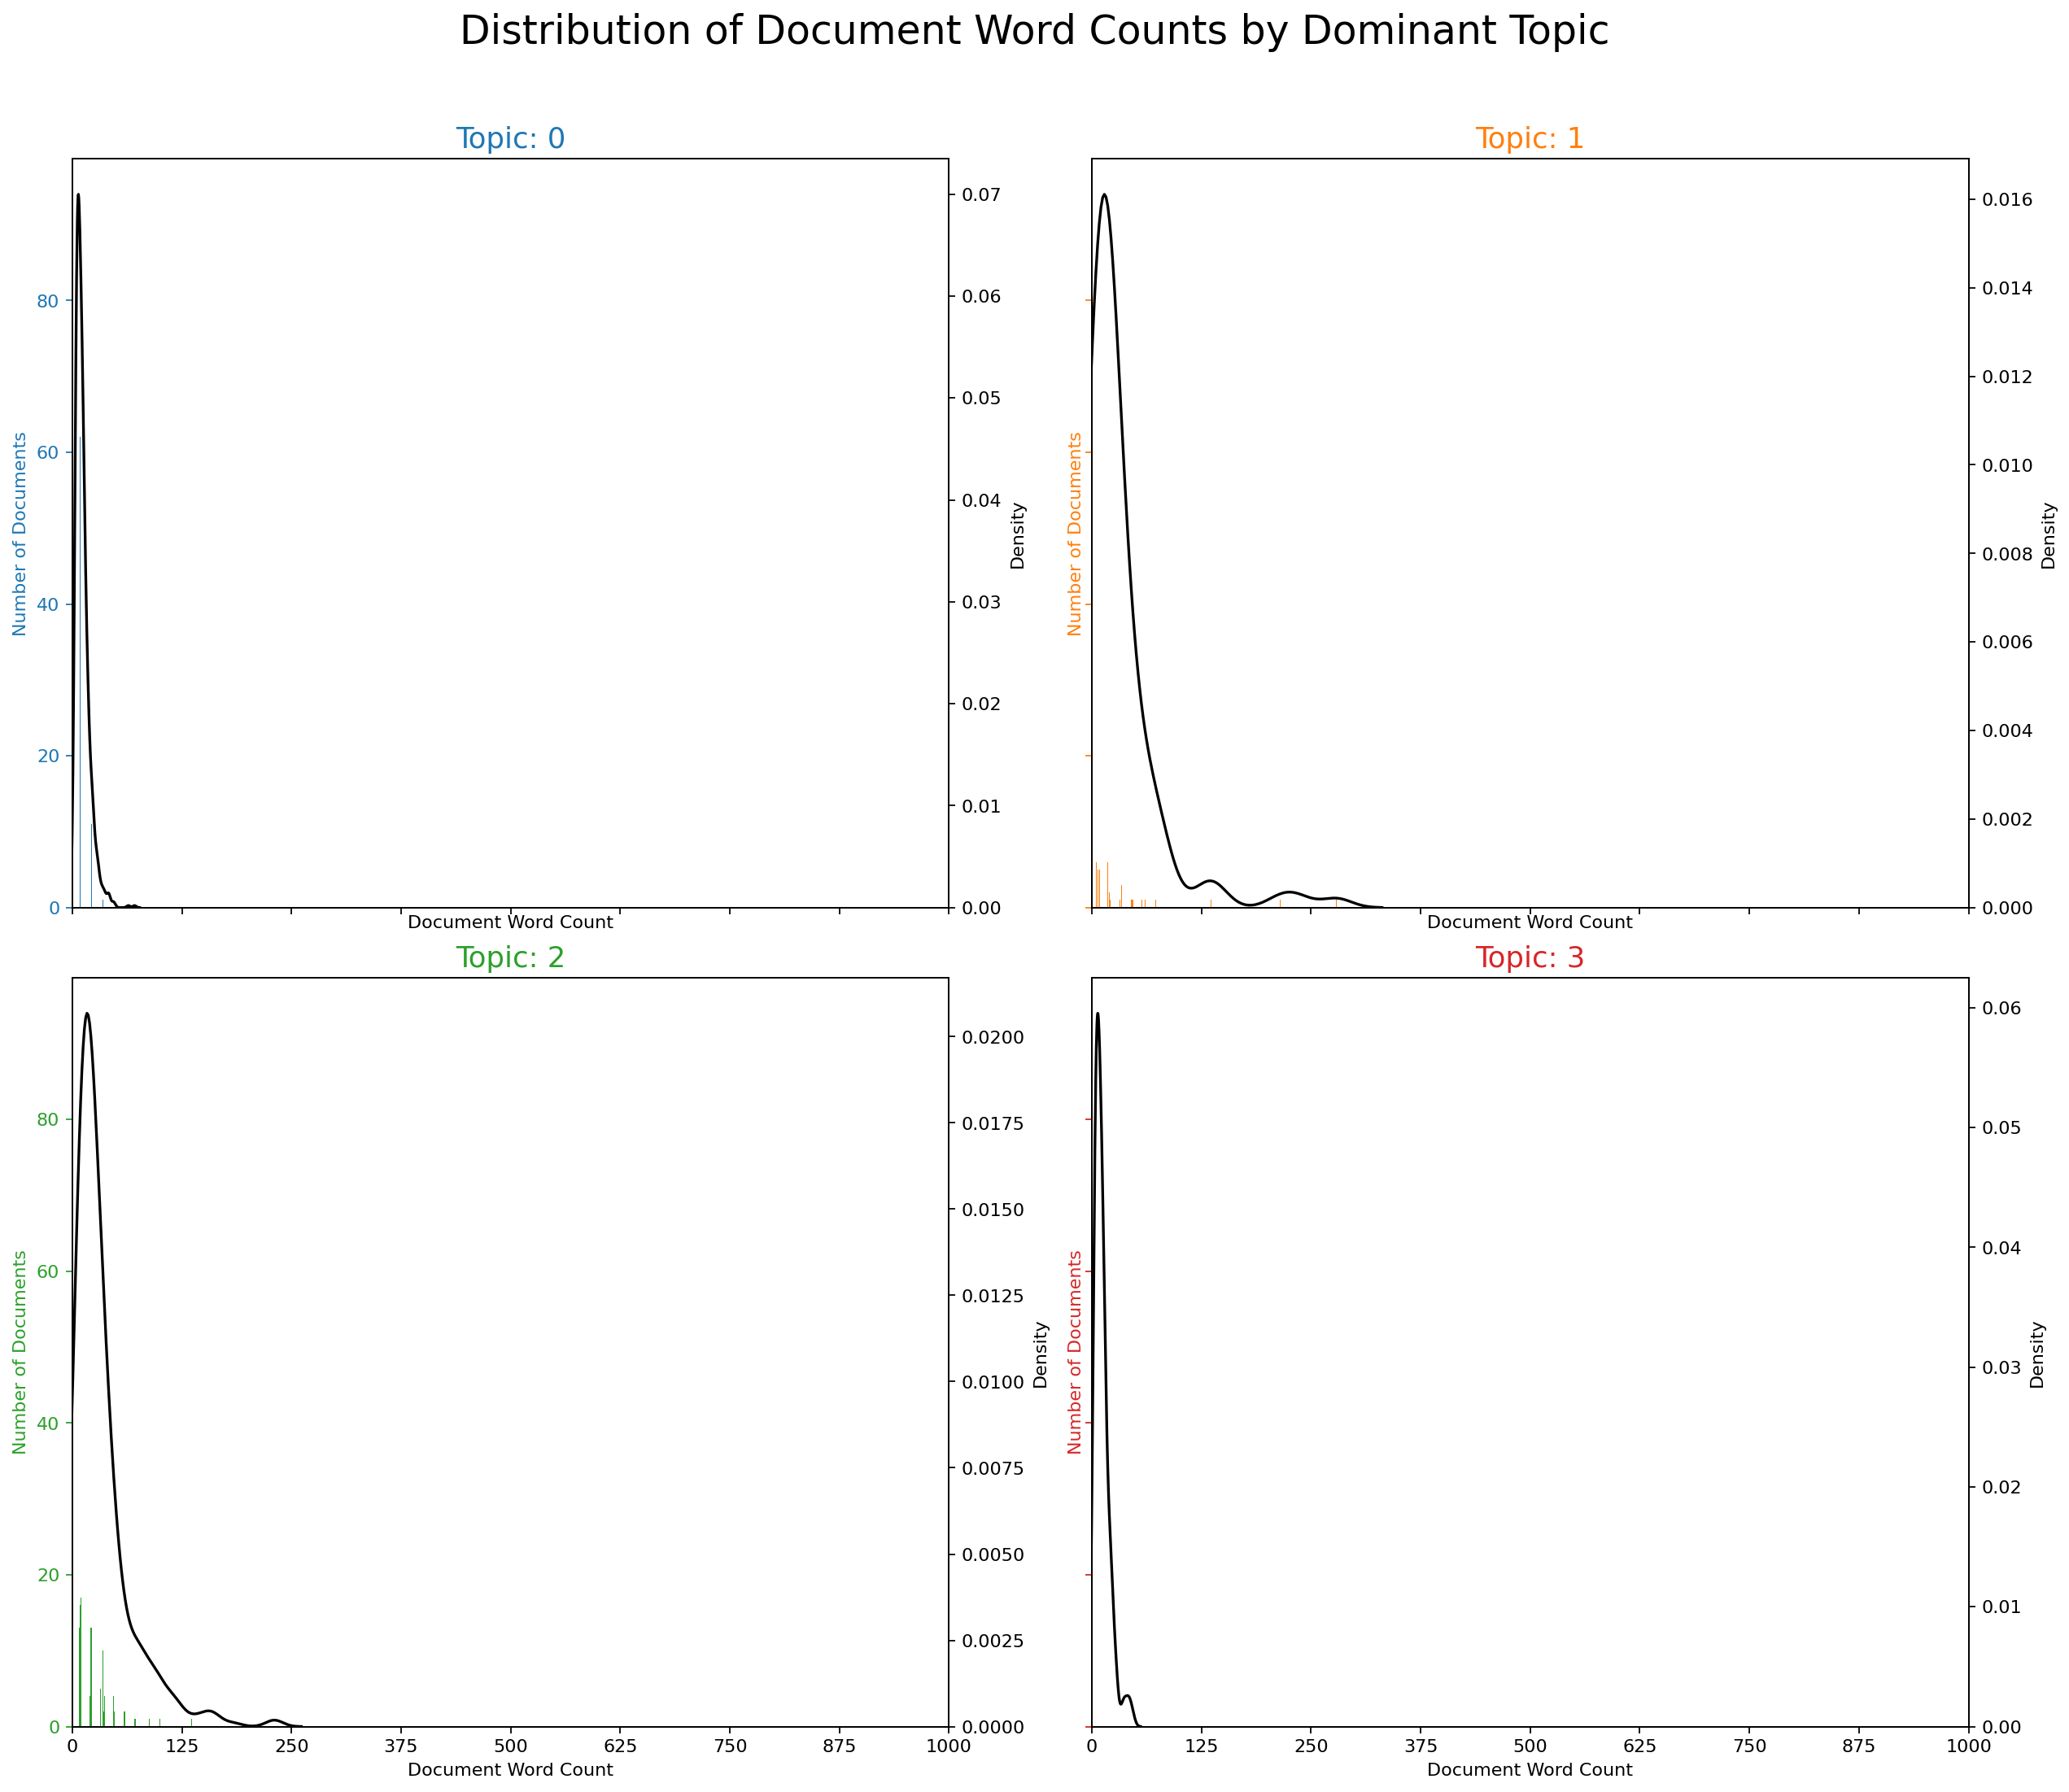

In [47]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    cityfibre_reviews_dominant_topic_sub =  cityfibre_reviews_dominant_topic.loc[ cityfibre_reviews_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in  cityfibre_reviews_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

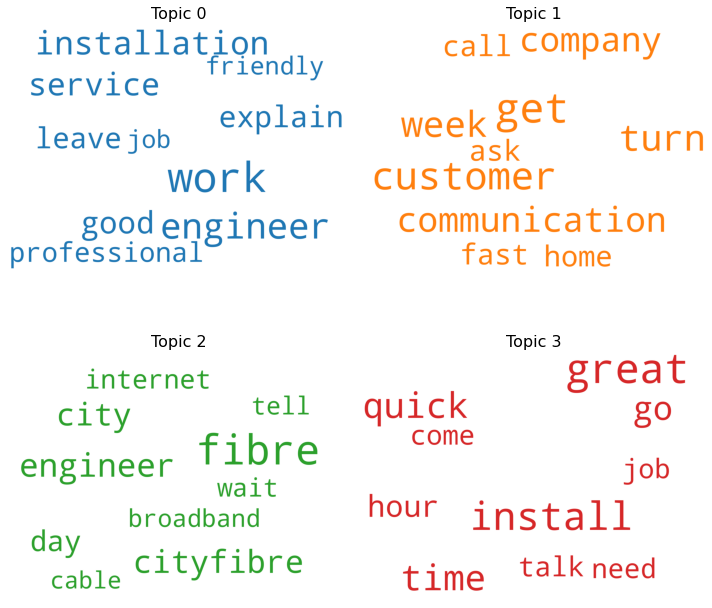

In [48]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Word Counts of Topic Keywords

C:\Users\DAYOTO~1\AppData\Local\Temp/ipykernel_21448/2988875143.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, 'word'],


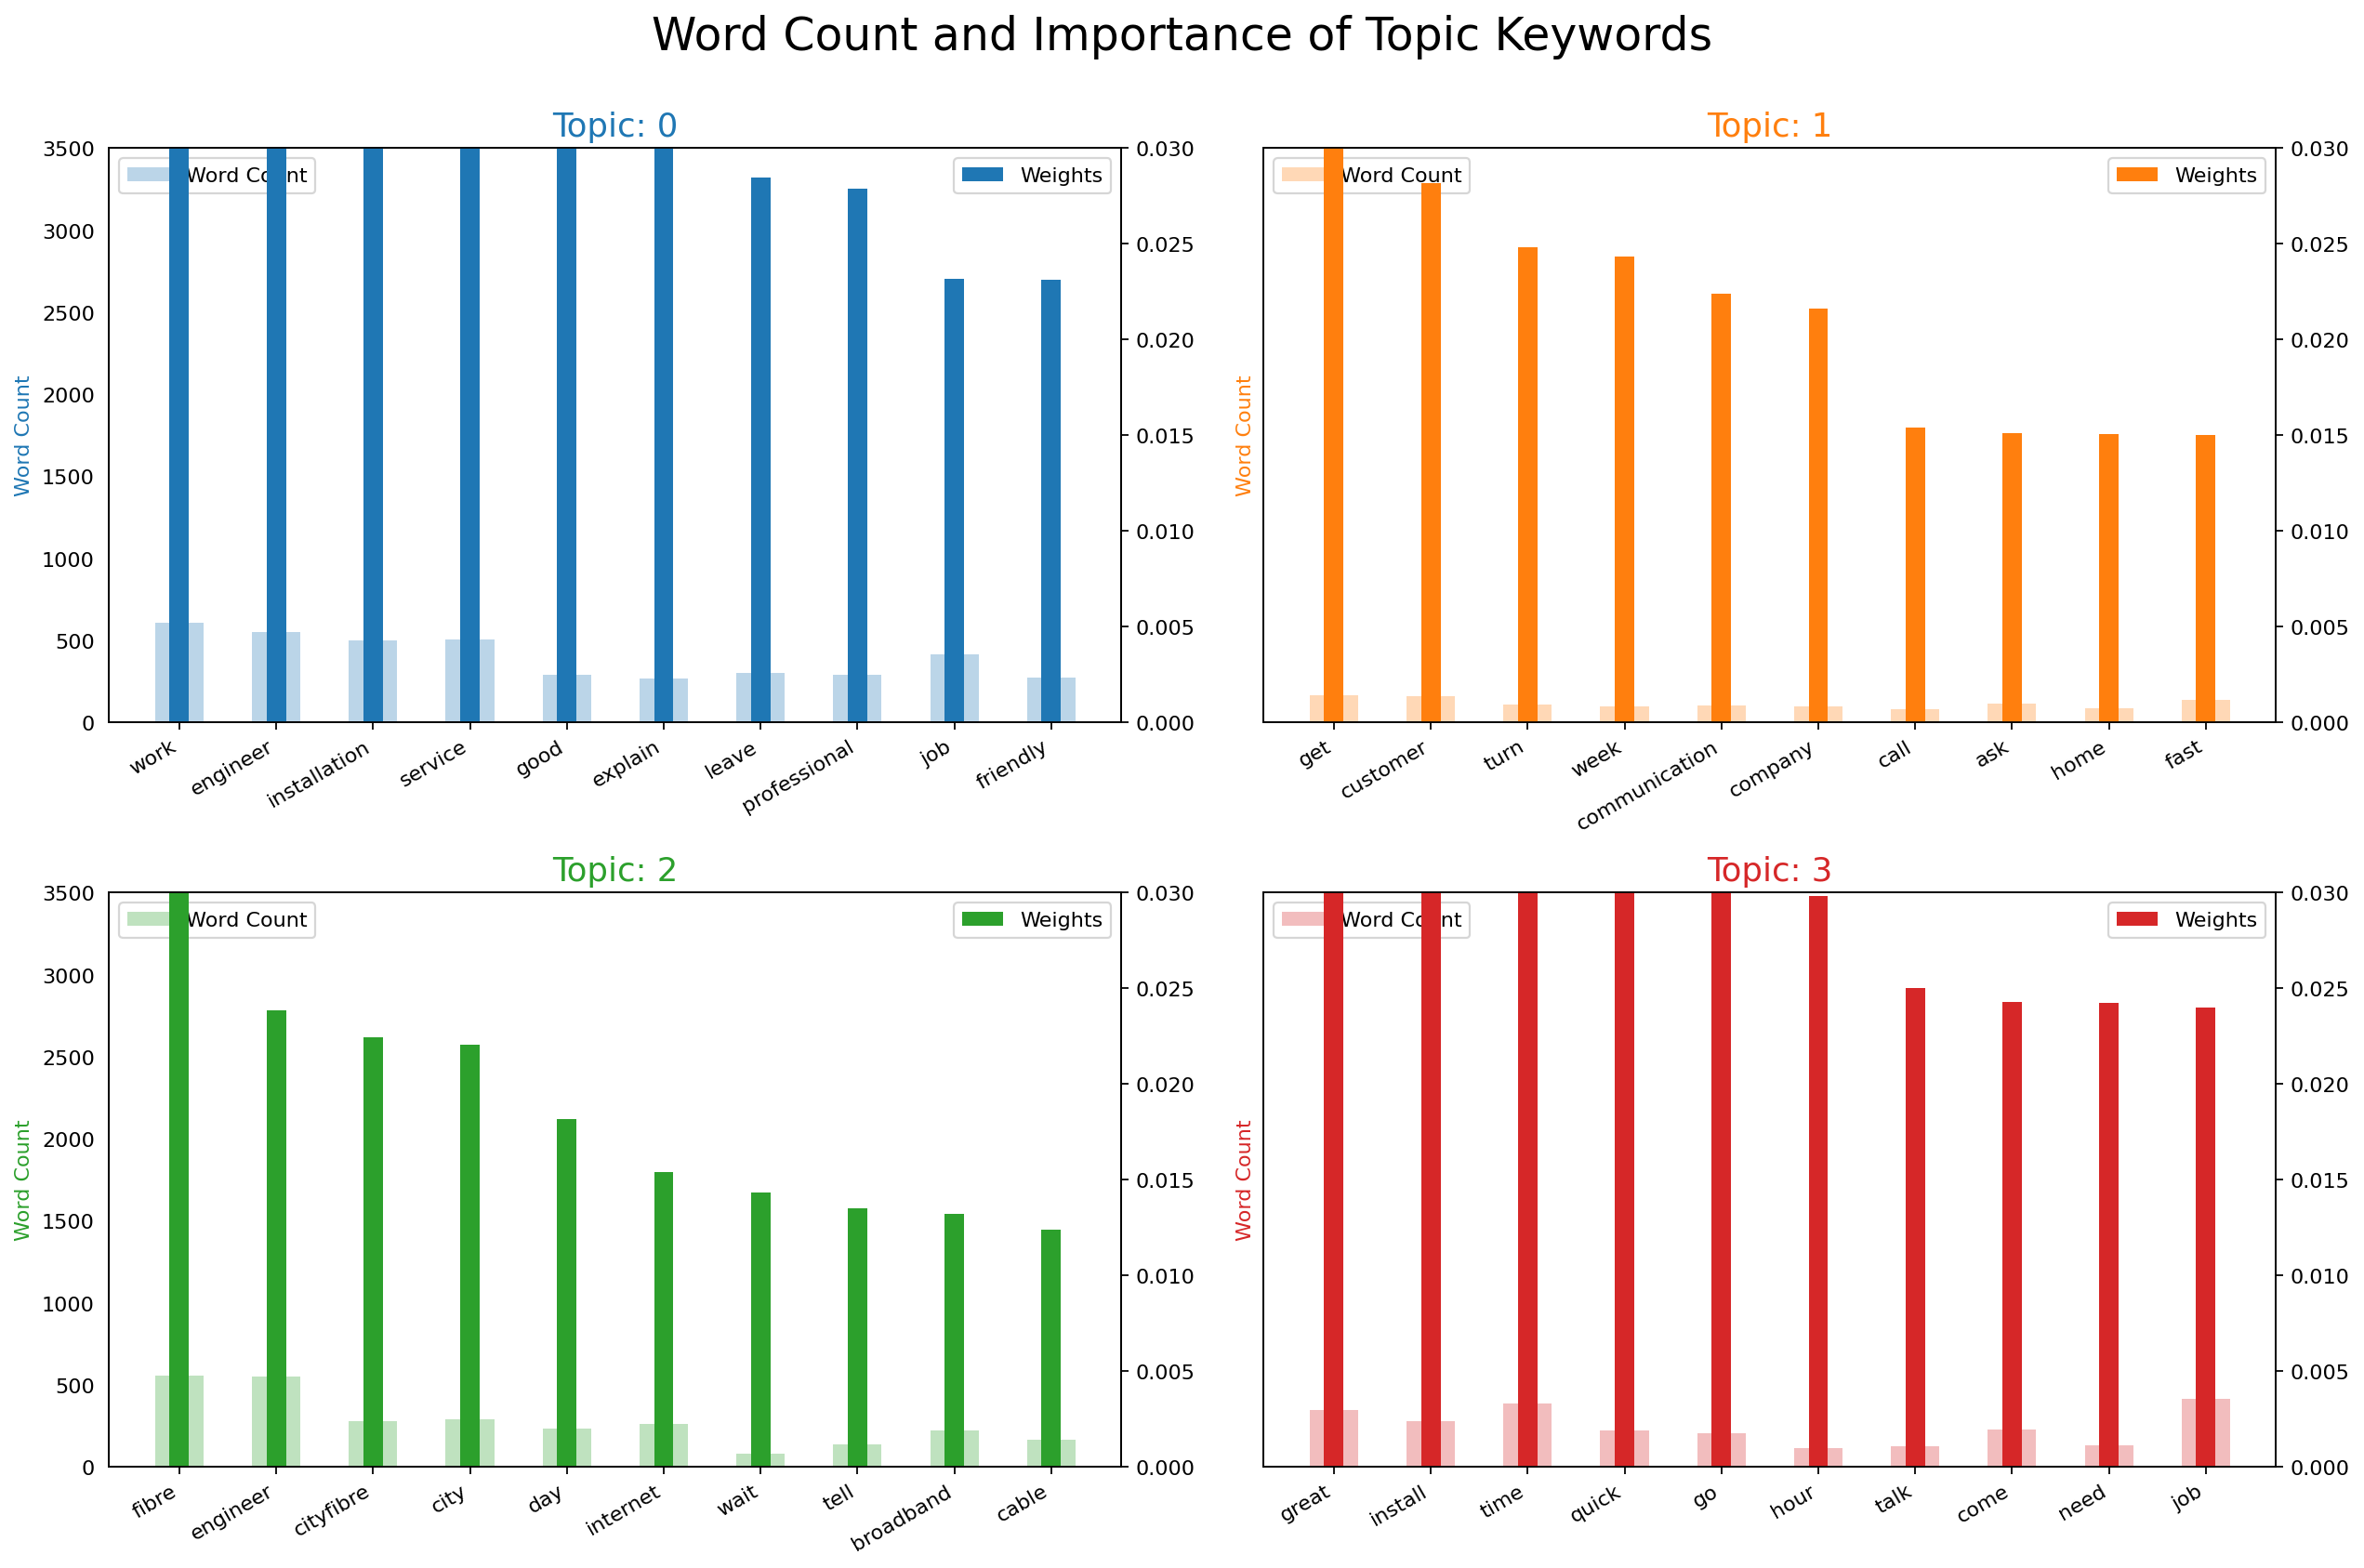

In [49]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

cityfibre_reviews = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", 
           data=cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, :],
           color=cols[i], 
           width=0.5, 
           alpha=0.3, 
           label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", 
                data=cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, :], 
                color=cols[i], 
                width=0.2, 
                label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, 'word'], 
                       rotation=30, 
                       horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# What are the most discussed topics in the documents

In [50]:
#compute the total number of documents attributed to each topic
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
cityfibre_reviews = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = cityfibre_reviews.groupby('Dominant_Topic').size()
cityfibre_reviews_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
cityfibre_reviews_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

cityfibre_reviews_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
cityfibre_reviews_top3words = cityfibre_reviews_top3words_stacked.groupby('topic_id').agg(', \n'.join)
cityfibre_reviews_top3words.reset_index(level=0,inplace=True)

# Create two plots:
#The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
#The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

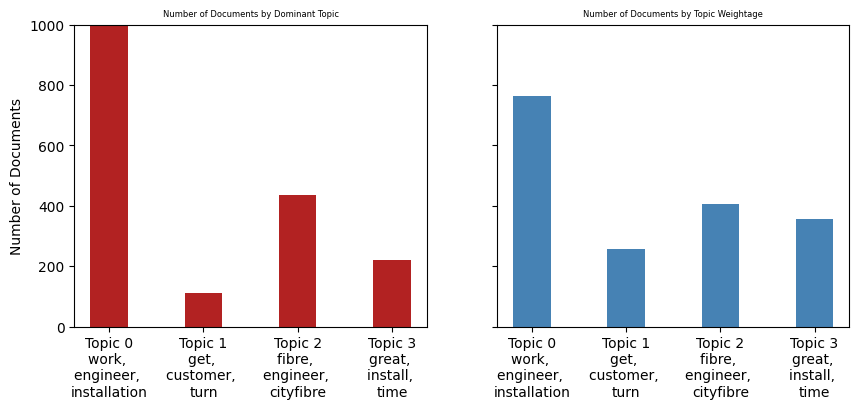

In [51]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', 
        data=cityfibre_reviews_dominant_topic_in_each_doc, 
        width=.4, color='firebrick')
ax1.set_xticks(range(cityfibre_reviews_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + cityfibre_reviews_top3words.loc[cityfibre_reviews_top3words.topic_id==x,
                                                                                                        'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=6))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=cityfibre_reviews_topic_weightage_by_doc, 
        width=.4, color='steelblue')
ax2.set_xticks(range(cityfibre_reviews_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=6))

plt.show()

# Sentence Chart Colored by Topic

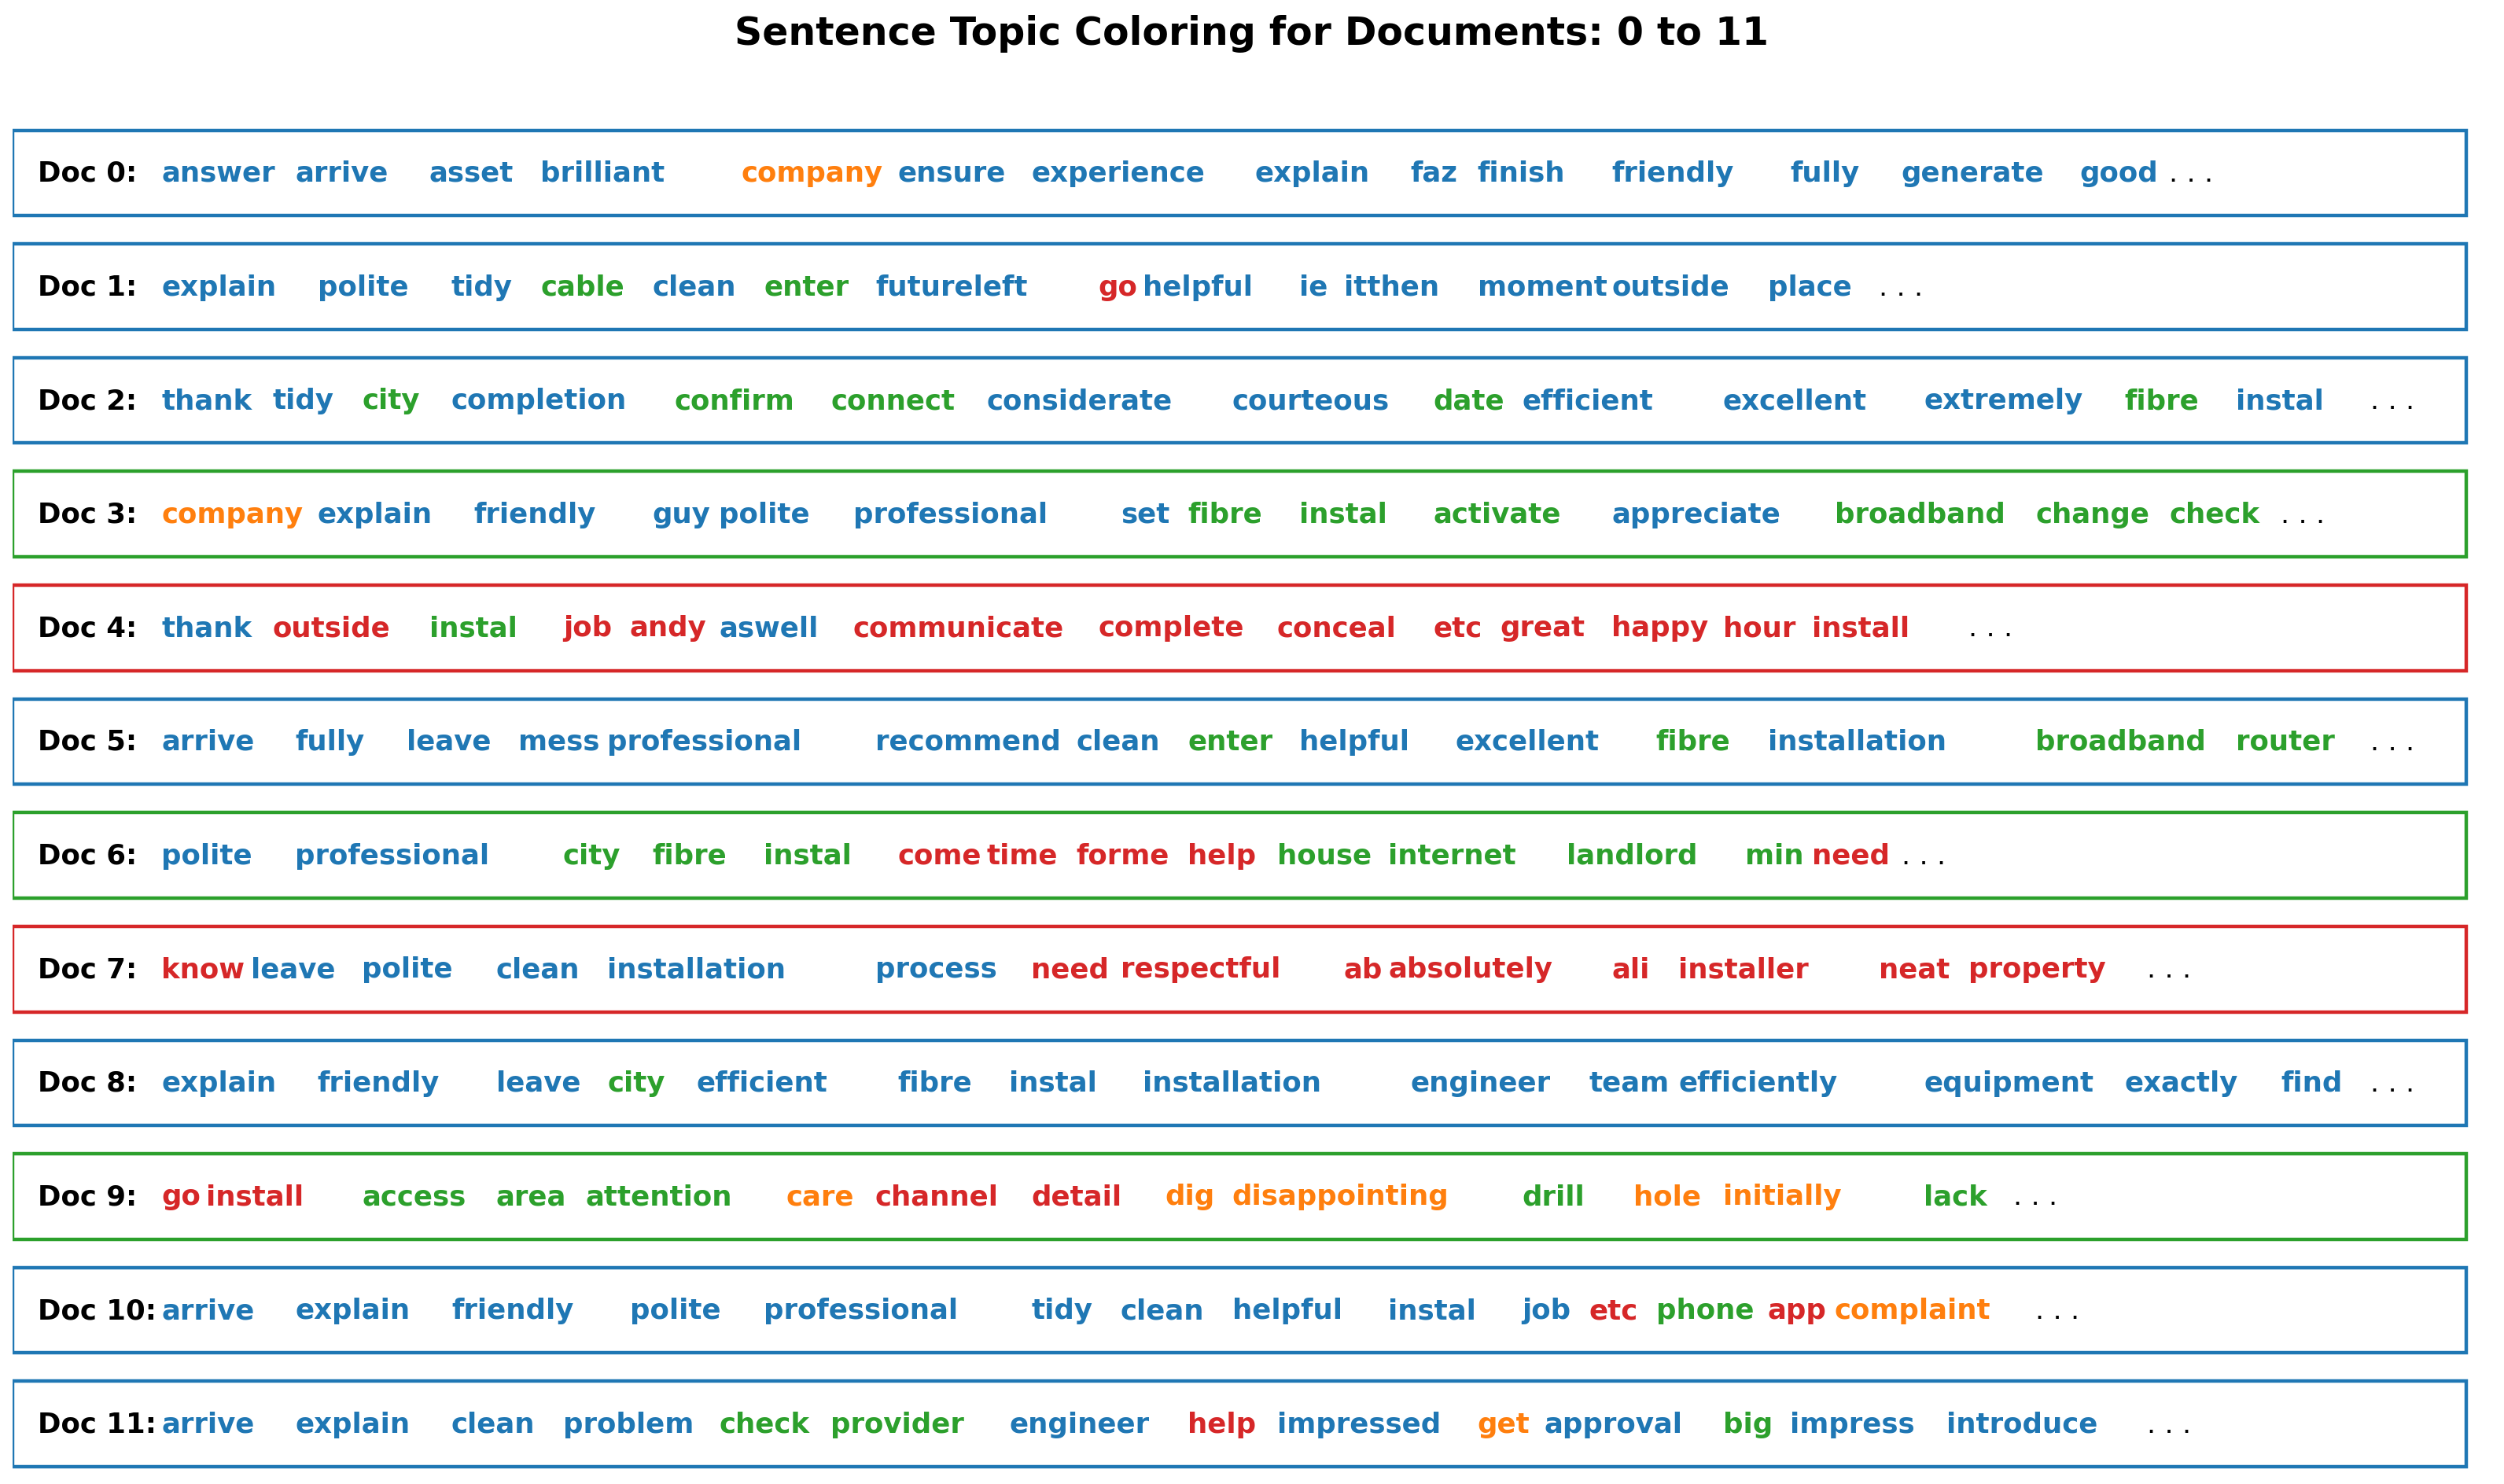

In [52]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), 
                 fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [53]:
cityfibre_reviews

,Document_Id,Dominant_Topic
0,0,0
1,1,0
2,2,0
3,3,2
4,4,3
...,...,...
1779,1779,3
1780,1780,0
1781,1781,2
1782,1782,0
